### Colab Activity 15.4: Computing the Gradient of a Two-Dimensional Function

In this activity you will use Python to determine the gradient of a two dimensional formula.  Below, a simple 2D quadratic function is given as an analogue to the typical quadratic we have been using.  We demonstrate visualizing a 3D function using `matplotlib`.  Along the way, we will determine the gradients using the symbolic computing power of `sympy`.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
def f(x, y):
    return x**2 + y**2

In [3]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

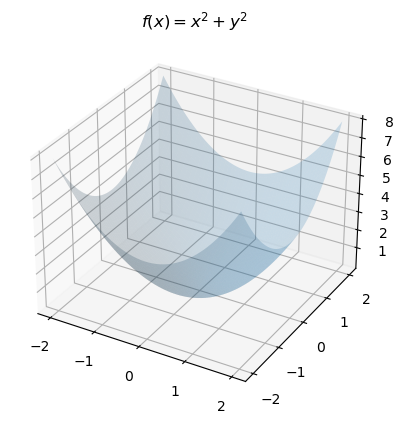

In [4]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
plt.title(r'$f(x) = x^2 + y^2$');

[Back to top](#-Index)

### Problem 1

#### Derivative with respect to $x$ and $y$



Below, we turn to `sympy`, a symbolic computing library, to evaluate the partial derivative with respect to $x$ and $y$.  Note that a maximum or minimum value will occur where both the partial derivative with respect to $x$ and $y$ are equal to zero.  Further, the gradient is the vector formed by these partial derivatives.  

$$\nabla f = <2x, 2y>$$

At what point does this suggest the minimum of $f(x, y) = x^2 + y^2$ lies?  Enter your solution as a tuple $(x, y)$ to `minimum_1`.  

In [5]:
x, y = sy.symbols('x y')

In [6]:
#computing the derivative with respect to x
sy.diff(f(x, y), x)

2*x

In [7]:
#computing the derivative with respect to y
sy.diff(f(x, y), y)

2*y

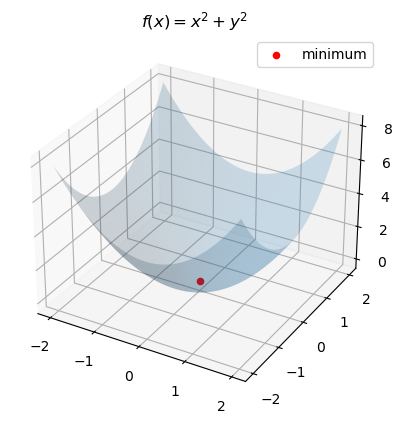

In [8]:

minimum_1 = ''


minimum_1 = (0, 0)

### ANSWER CHECK
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
ax.scatter3D(minimum_1[0], minimum_1[1], f(minimum_1[0], minimum_1[1]), s = 20, c = 'red', label = 'minimum')
plt.legend()
plt.title(r'$f(x) = x^2 + y^2$');

[Back to top](#-Index)

### Problem 2

#### Example with Data




Below, we load in the data from our earlier credit example and build the model

$$\hat{y} = \theta_0 X + \theta_1$$

and determine the mean squared error as

$$\frac{1}{n} \sum_{i = 1}^n (\hat{y} - y)^2$$

Use the `LinearRegression` estimator from Scikit-Learn to determine the values for $\theta_0$ and $\theta_1$ that minimize the `mse` function.

In [9]:
credit = pd.read_csv('data/Credit.csv', index_col=0)
X = credit['Rating'].values
y = credit['Balance'].values

In [10]:
def mse(theta0, theta1):
  yhat = theta0*X + theta1
  error = y - yhat
  squared_error = np.sum(error**2)
  return 1/(2*X.shape[0]) * squared_error

In [11]:
mse = np.vectorize(mse)

In [12]:
theta1 = np.linspace(0, 6, 100)
theta0 = np.linspace(-400, -360, 100)
T1, T0 = np.meshgrid(theta1, theta0)

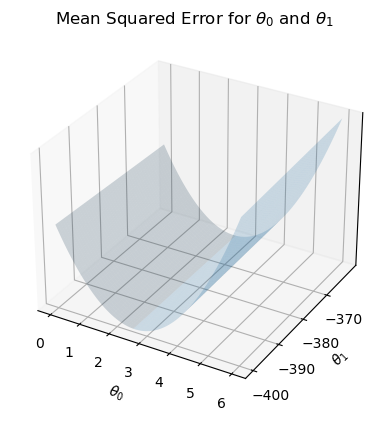

In [13]:
ax = plt.axes(projection = '3d')
ax.plot_surface(T1, T0, mse(T1, T0), alpha = 0.2)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$')
ax.set_zticks([])
ax.set_yticks(np.arange(-400, -360, 10));

In [15]:

best_theta_0 = ''
best_theta_1 = ''

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X_reshaped, y)

best_theta_0 = model.coef_  # Slope
best_theta_1 = model.intercept_  # Intercept



### ANSWER CHECK
print(f'Equation with optimal parameters: y = {best_theta_0[0]: .2f}x + {best_theta_1: .2f}')

Equation with optimal parameters: y =  2.57x + -390.85


### Summary of Exercises

This notebook explored gradient computation and optimization in two different contexts:

**Exercise 1: Gradient of a 2D Quadratic Function**
- Analyzed f(x,y) = x² + y²
- Used sympy to compute partial derivatives
- Found gradient ∇f = <2x, 2y>
- Identified minimum at (0,0)
- Visualized the function in 3D

**Exercise 2: Linear Regression Optimization**
- Used real credit data to fit a linear model
- Implemented mean squared error (MSE) function
- Visualized MSE landscape for different parameter values
- Used sklearn to find optimal parameters
- Demonstrated practical optimization in machine learning

### Key Takeaways

1. **Gradient Analysis**
   - Partial derivatives give direction of steepest increase
   - Critical points occur where gradient = 0
   - For quadratic functions, single minimum is easily found

2. **Optimization in Practice**
   - MSE provides a way to measure model performance
   - Linear regression finds parameters that minimize MSE
   - 3D visualization helps understand optimization landscape
   - Libraries like sklearn implement efficient optimization algorithms

3. **Mathematical Tools**
   - Sympy enables symbolic computation
   - Numpy provides vectorized operations
   - Matplotlib allows 3D visualization of functions